<h1>Extracting and Visualizing Stock Data</h1>



<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Part 1: Use yfinance to Extract Stock Data</li>
        <li>Part 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Part 3: Use yfinance to Extract Stock Data</li>
        <li>Part 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Part 5: Plot Tesla Stock Graph</li>
        <li>Part 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [26]:
!pip install --upgrade yfinance beautifulsoup4 requests nbformat matplotlib lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.6 MB/s  0:00:00 eta 0:00:01


In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [7]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

Matplotlib is building the font cache; this may take a moment.


## Parrt 1: Use yfinance to Extract Stock Data


In [8]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Part 2: Use Webscraping to Extract Tesla Revenue Data


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [32]:
tesla_revenue = pd.read_html(url)[1]


In [ ]:
# Step 1: Create an Empty DataFrame with specified headers
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 2 & 3: Find the Relevant Table (Quarterly Revenue is usually in the second tbody)
# We isolate the table body using find_all
table = soup.find_all("tbody")[1]

# Step 4, 5 & 6: Iterate Through Rows and Extract Data from Columns
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text
        
        # Create a temporary dataframe for the new row and concatenate it
        new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Data Cleaning: Remove currency symbols and commas to allow plotting
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Remove null values or empty strings to ensure data quality
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows to verify success
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Part 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [38]:
gme = yf.Ticker("GME")

In [39]:
gme_data = gme.history(period="max")

In [40]:
gme_data.reset_index(inplace=True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Part 4: Use Webscraping to Extract GME Revenue Data


In [41]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [42]:
soup2 = BeautifulSoup(html_data_2, "html.parser")

Remove the comma and dollar sign, an null or empty strings from the Revenue column

In [47]:
gme_revenue = pd.read_html(url2)[1]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [49]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Part 5: Plot Tesla Stock Graph


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


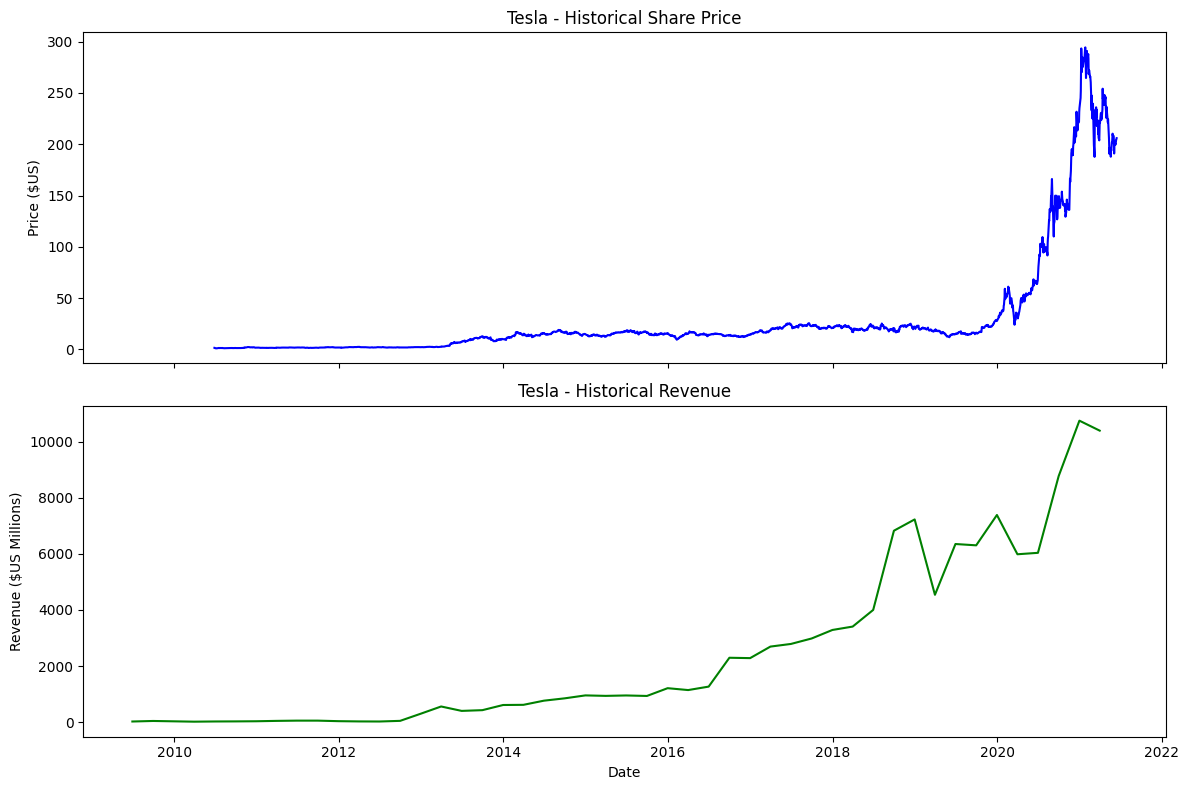

In [45]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


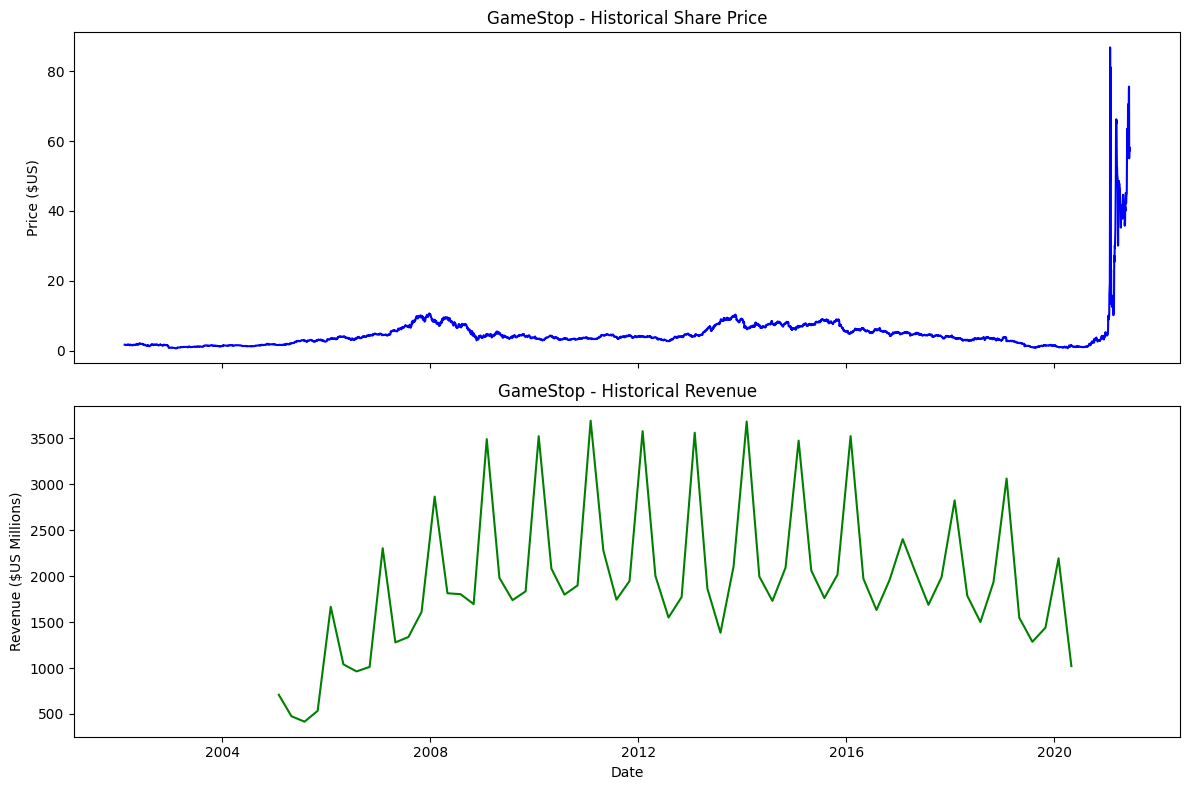

In [46]:
make_graph(gme_data, gme_revenue, 'GameStop')

Copyright © 2020 IBM Corporation. All rights reserved.
